In [1]:
import numpy as np
import pandas as pd
import pandas_summary
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt
from datetime import datetime
from datetime import timedelta
%matplotlib inline
import math
import pandas_profiling
from sklearn.model_selection import train_test_split
from sklearn import metrics

print(pd.__version__)
print(np.__version__)
print(sns.__version__)

from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please ensure you have installed TensorFlow correctly')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

0.25.3
1.16.5
0.9.0
TensorFlow Version: 2.1.0
Default GPU Device: /device:GPU:0


## User Defined Functions

In [2]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([
        x.count(),
        x.isnull().sum(),
        x.sum(),
        x.mean(),
        x.median(),
        x.std(),
        x.var(),
        x.min(),
        x.quantile(0.01),
        x.quantile(0.05),
        x.quantile(0.10),
        x.quantile(0.25),
        x.quantile(0.50),
        x.quantile(0.75),
        x.quantile(0.90),
        x.quantile(0.95),
        x.quantile(0.99),
        x.max()
    ],
                     index=[
                         'N', 'NMISS', 'SUM', 'MEAN', 'MEDIAN', 'STD', 'VAR',
                         'MIN', 'P1', 'P5', 'P10', 'P25', 'P50', 'P75', 'P90',
                         'P95', 'P99', 'MAX'
                     ])

In [3]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending=False)[0:1].reset_index()
    return pd.Series([
        x.count(),
        x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1],
        round(Mode.iloc[0, 1] * 100 / x.count(), 2)
    ],
                     index=['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [4]:
# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats='mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode())
    return x

In [5]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop(colname, axis=1, inplace=True)
    return df

In [6]:
# create user defined function to create the freq plots
def fn_countplot(pd_series):
    plt.figure(figsize=(5, 3))
    sns.countplot(y=pd_series)
    print('This is a freq chart for ' + pd_series.name)
    plt.show()
    return

In [7]:
#Outlier Treatment

def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

## Importing the files

In [8]:
incharge = pd.read_csv(
    'Medicare_Charge_Inpatient_DRG100_DRG_Summary_by_DRG_FY2011.csv')

outcharge = pd.read_csv(
    'Medicare_Charge_Outpatient_APC30_Summary_by_APC_CY2011.csv')

inpatient = pd.read_csv(
    'Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv')

outpatient = pd.read_csv(
    'Medicare_Provider_Charge_Outpatient_APC30_CY2011_v2.csv')

history = pd.read_csv('Patient_history_samp.csv')

review = pd.read_csv('Review_patient_history_samp.csv')

review_trans = pd.read_csv('Rreview_transaction_coo.csv')

trans = pd.read_csv('Transaction_coo.csv')

## User Defined Functions

In [9]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([
        x.count(),
        x.isnull().sum(),
        x.sum(),
        x.mean(),
        x.median(),
        x.std(),
        x.var(),
        x.min(),
        x.quantile(0.01),
        x.quantile(0.05),
        x.quantile(0.10),
        x.quantile(0.25),
        x.quantile(0.50),
        x.quantile(0.75),
        x.quantile(0.90),
        x.quantile(0.95),
        x.quantile(0.99),
        x.max()
    ],
                     index=[
                         'N', 'NMISS', 'SUM', 'MEAN', 'MEDIAN', 'STD', 'VAR',
                         'MIN', 'P1', 'P5', 'P10', 'P25', 'P50', 'P75', 'P90',
                         'P95', 'P99', 'MAX'
                     ])

In [10]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending=False)[0:1].reset_index()
    return pd.Series([
        x.count(),
        x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1],
        round(Mode.iloc[0, 1] * 100 / x.count(), 2)
    ],
                     index=['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [11]:
# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats='mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode())
    return x 

In [12]:
#An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop(colname, axis=1, inplace=True)
    return df

In [13]:
# create user defined function to create the freq plots
def fn_countplot(pd_series):
    plt.figure(figsize=(5, 3))
    sns.countplot(y=pd_series)
    print('This is a freq chart for ' + pd_series.name)
    plt.show()
    return

## Data Inspection for Analysis

In [14]:
inpatient.info()
#No null values found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
DRG Definition                                163065 non-null object
Provider Id                                   163065 non-null int64
Provider Name                                 163065 non-null object
Provider Street Address                       163065 non-null object
Provider City                                 163065 non-null object
Provider State                                163065 non-null object
Provider Zip Code                             163065 non-null int64
Hospital Referral Region (HRR) Description    163065 non-null object
Total Discharges                              163065 non-null int64
Average Covered Charges                       163065 non-null float64
Average Total Payments                        163065 non-null float64
Average Medicare Payments                     163065 non-null float64
dtypes: float64(3), int64(3), object(6)
memory usage: 14.9+ M

In [15]:
outpatient.info()

#No null values found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43372 entries, 0 to 43371
Data columns (total 11 columns):
APC                                           43372 non-null object
Provider Id                                   43372 non-null int64
Provider Name                                 43372 non-null object
Provider Street Address                       43372 non-null object
Provider City                                 43372 non-null object
Provider State                                43372 non-null object
Provider Zip Code                             43372 non-null int64
Hospital Referral Region (HRR) Description    43372 non-null object
Outpatient Services                           43372 non-null int64
Average  Estimated Submitted Charges          43372 non-null float64
Average Total Payments                        43372 non-null float64
dtypes: float64(2), int64(3), object(6)
memory usage: 3.6+ MB


In [16]:
incharge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
DRG Definition               100 non-null object
Total Discharges             100 non-null int64
Average Covered Charges      100 non-null float64
Average Total Payments       100 non-null float64
Average Medicare Payments    100 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.0+ KB


In [17]:
outcharge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
APC                                    30 non-null object
Outpatient Services                    30 non-null int64
Average Estimated Submitted Charges    30 non-null float64
Average Total Payments                 30 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.1+ KB


In [18]:
incharge.head()

,DRG Definition,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,37861,29228.55368,6902.381289,5514.435910
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,37927,23924.98059,6809.799325,5791.920242
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,68163,49186.95644,13614.616130,12415.825360
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,110983,30371.27399,8037.269492,6858.689088
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,62346,23300.06199,5762.881821,4508.202659


In [19]:
outcharge.head()

,APC,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
0,0012 - Level I Debridement & Destruction,275987,74.202956,16.147079
1,0013 - Level II Debridement & Destruction,434706,196.170070,56.133853
2,0015 - Level III Debridement & Destruction,509576,326.503444,97.156250
3,0019 - Level I Excision/ Biopsy,27860,2013.181972,330.908369
4,0020 - Level II Excision/ Biopsy,40642,3161.457873,567.156154


In [20]:
inpatient.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,5777.241758,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,5787.571429,4976.714286
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37500,5434.958333,4453.791667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28000,5417.560000,4129.160000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27778,5658.333333,4851.444444


In [21]:
outpatient.head()

,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
0,0012 - Level I Debridement & Destruction,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,23,78.086957,21.910435
1,0012 - Level I Debridement & Destruction,20024,CENTRAL PENINSULA GENERAL HOSPITAL,250 HOSPITAL PLACE,SOLDOTNA,AK,99669,AK - Anchorage,994,149.589749,36.623853
2,0012 - Level I Debridement & Destruction,30064,"UNIVERSITY OF ARIZONA MEDICAL CTR-UNIVERSIT, THE",1501 NORTH CAMPBELL AVENUE,TUCSON,AZ,85724,AZ - Tucson,1765,50.135411,14.541841
3,0012 - Level I Debridement & Destruction,30088,BANNER BAYWOOD MEDICAL CENTER,6644 EAST BAYWOOD AVENUE,MESA,AZ,85206,AZ - Mesa,20,112.400000,23.736000
4,0012 - Level I Debridement & Destruction,30111,"UNIVERSITY OF ARIZONA MEDICAL CTR- SOUTH CAM, THE",2800 EAST AJO WAY,TUCSON,AZ,85713,AZ - Tucson,22,152.045455,16.569091


### Part1: Identify providers that overcharge for certain procedures or regions where procedures are too expensive.

### Part1: A: Highest Cost Variation

In [22]:
#For Inpatient

In [23]:
a = inpatient.loc[:, [
    'DRG Definition', 'Provider State', 'Average Medicare Payments'
]]
a.head()

,DRG Definition,Provider State,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4976.714286
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4453.791667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4129.160000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4851.444444


In [24]:
amax = a.loc[a.groupby([
    'DRG Definition', 'Provider State'
])['Average Medicare Payments'].idxmax()].reset_index(drop=True)

amin = a.loc[a.groupby([
    'DRG Definition', 'Provider State'
])['Average Medicare Payments'].idxmin()].reset_index(drop=True)

In [32]:
a1 = amax.copy()
a1['Variation'] = amax['Average Medicare Payments'] - amin[
    'Average Medicare Payments']
#a1.drop(columns = ['Average Medicare Payments'] , inplace = True)
a1.loc[a1.groupby(['DRG Definition'])['Variation'].idxmax()].head()

,DRG Definition,Provider State,Average Medicare Payments,Variation
20,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,MD,15855.18182,11506.646106
55,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,CA,22553.56250,18335.419643
122,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,MD,48632.28125,40323.965461
157,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,CA,23402.26316,17437.811237
208,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,CA,13710.23529,9972.780745


In [33]:
#For outpatient
a = outpatient.loc[:, ['APC', 'Provider State', 'Average Total Payments']]
a.head()

,APC,Provider State,Average Total Payments
0,0012 - Level I Debridement & Destruction,AL,21.910435
1,0012 - Level I Debridement & Destruction,AK,36.623853
2,0012 - Level I Debridement & Destruction,AZ,14.541841
3,0012 - Level I Debridement & Destruction,AZ,23.736000
4,0012 - Level I Debridement & Destruction,AZ,16.569091


In [34]:
amax=a.loc[a.groupby(['APC','Provider State'])['Average Total Payments'].idxmax()].reset_index(drop=True)
amin=a.loc[a.groupby(['APC','Provider State'])['Average Total Payments'].idxmin()].reset_index(drop=True)

In [36]:
a1 = amax.copy()
a1['Variation'] = amax['Average Total Payments'] - amin[
    'Average Total Payments']
#a1.drop(columns=['Average Total Payments'], inplace=True)
a1.loc[a1.groupby(['APC'])['Variation'].idxmax()].head()

,APC,Provider State,Average Total Payments,Variation
20,0012 - Level I Debridement & Destruction,MI,27.898261,20.593261
51,0013 - Level II Debridement & Destruction,CA,85.930000,47.025556
101,0015 - Level III Debridement & Destruction,CA,142.186505,83.536505
175,0019 - Level I Excision/ Biopsy,NY,416.140000,180.010667
194,0020 - Level II Excision/ Biopsy,CA,808.850000,296.625625


## Part1: B: Highest-Cost Claims by Provider

In [37]:
#For inpatient
b = inpatient.loc[:, [
    'DRG Definition', 'Provider Id', 'Average Medicare Payments'
]]
b.head()

,DRG Definition,Provider Id,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,4976.714286
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,4453.791667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,4129.160000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,4851.444444


In [38]:
bmax = b.loc[b.groupby([
    'DRG Definition', 'Provider Id'
])['Average Medicare Payments'].idxmax()].reset_index(drop=True)
bmax.loc[bmax.groupby(['DRG Definition'
                       ])['Average Medicare Payments'].idxmax()].head()

,DRG Definition,Provider Id,Average Medicare Payments
456,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,210029,15855.18182
1554,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,210009,22873.49398
2986,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,210009,48632.28125
4156,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50228,23402.26316
6365,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50228,13710.23529


In [39]:
#For outpatient
b = outpatient[['APC', 'Provider Id', 'Average Total Payments']]
b.head()

,APC,Provider Id,Average Total Payments
0,0012 - Level I Debridement & Destruction,10029,21.910435
1,0012 - Level I Debridement & Destruction,20024,36.623853
2,0012 - Level I Debridement & Destruction,30064,14.541841
3,0012 - Level I Debridement & Destruction,30088,23.736000
4,0012 - Level I Debridement & Destruction,30111,16.569091


In [40]:
bmax = b.loc[b.groupby(
    ['APC',
     'Provider Id'])['Average Total Payments'].idxmax()].reset_index(drop=True)
bmax.loc[bmax.groupby(['APC'])['Average Total Payments'].idxmax()].head()

,APC,Provider Id,Average Total Payments
1,0012 - Level I Debridement & Destruction,20024,36.623853
424,0013 - Level II Debridement & Destruction,50334,85.930000
1874,0015 - Level III Debridement & Destruction,50153,142.186505
3322,0019 - Level I Excision/ Biopsy,50002,470.720000
3837,0020 - Level II Excision/ Biopsy,50153,808.850000


In [41]:
#Part1: C: Highest-Cost Claims by Region

In [44]:
#For inpatient
c = inpatient.loc[:,[
    'DRG Definition', 'Provider State', 'Average Medicare Payments'
]]
c.head()

,DRG Definition,Provider State,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4976.714286
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4453.791667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4129.160000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4851.444444


In [45]:
cmax = c.loc[c.groupby([
    'DRG Definition', 'Provider State'
])['Average Medicare Payments'].idxmax()].reset_index(drop=True)
cmax.loc[cmax.groupby(['DRG Definition'
                       ])['Average Medicare Payments'].idxmax()].head()

,DRG Definition,Provider State,Average Medicare Payments
20,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,MD,15855.18182
71,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,MD,22873.49398
122,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,MD,48632.28125
157,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,CA,23402.26316
208,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,CA,13710.23529


In [46]:
#For outpatient
c = outpatient[['APC', 'Provider State', 'Average Total Payments']]
c.head()

,APC,Provider State,Average Total Payments
0,0012 - Level I Debridement & Destruction,AL,21.910435
1,0012 - Level I Debridement & Destruction,AK,36.623853
2,0012 - Level I Debridement & Destruction,AZ,14.541841
3,0012 - Level I Debridement & Destruction,AZ,23.736000
4,0012 - Level I Debridement & Destruction,AZ,16.569091


In [47]:
cmax = c.loc[c.groupby([
    'APC', 'Provider State'
])['Average Total Payments'].idxmax()].reset_index(drop=True)
cmax.loc[cmax.groupby(['APC'])['Average Total Payments'].idxmax()].head()

,APC,Provider State,Average Total Payments
0,0012 - Level I Debridement & Destruction,AK,36.623853
51,0013 - Level II Debridement & Destruction,CA,85.930000
101,0015 - Level III Debridement & Destruction,CA,142.186505
150,0019 - Level I Excision/ Biopsy,CA,470.720000
194,0020 - Level II Excision/ Biopsy,CA,808.850000


In [48]:
#Part1: D: Highest Number of Procedures and Largest Differences between Claims and Reimbursements

In [49]:
#For inpatient
d = inpatient[[
    'DRG Definition', 'Provider State', 'Total Discharges',
    'Average Total Payments', 'Average Medicare Payments'
]]
d.head()

,DRG Definition,Provider State,Total Discharges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,91,5777.241758,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,14,5787.571429,4976.714286
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,24,5434.958333,4453.791667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,25,5417.560000,4129.160000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,18,5658.333333,4851.444444


In [50]:
#DPC=Difference between Average Total Payments and Average Medicare Payments per discharge
d['DPC'] = (d['Average Total Payments'] -
            d['Average Medicare Payments']) / d['Total Discharges']
d.drop([
    'Total Discharges', 'Average Total Payments', 'Average Medicare Payments'
],
       axis=1,
       inplace=True)
dmax = d.loc[d.groupby(['DRG Definition', 'Provider State'
                        ])['DPC'].idxmax()].reset_index(drop=True)
dmax.loc[dmax.groupby(['DRG Definition'])['DPC'].idxmax()].head()

C:\Users\shaur\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\shaur\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,DRG Definition,Provider State,DPC
14,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,IL,876.167969
66,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,IN,314.899408
116,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,IL,1020.664062
164,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,HI,1410.236111
235,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,NJ,437.876033


In [51]:
#For outpatient

In [52]:
d = outpatient[[
    'APC', 'Provider State', 'Outpatient Services',
    'Average  Estimated Submitted Charges', 'Average Total Payments'
]]
d.head()

,APC,Provider State,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
0,0012 - Level I Debridement & Destruction,AL,23,78.086957,21.910435
1,0012 - Level I Debridement & Destruction,AK,994,149.589749,36.623853
2,0012 - Level I Debridement & Destruction,AZ,1765,50.135411,14.541841
3,0012 - Level I Debridement & Destruction,AZ,20,112.400000,23.736000
4,0012 - Level I Debridement & Destruction,AZ,22,152.045455,16.569091


In [53]:
#DPO=Difference between Average Total Payments and Average Estimated Submitted Charges per outservice
d['DPO'] = (d['Average  Estimated Submitted Charges'] -
            d['Average Total Payments']) / d['Outpatient Services']
d.drop([
    'Outpatient Services', 'Average Total Payments',
    'Average  Estimated Submitted Charges'
],
       axis=1,
       inplace=True)
dmax = d.loc[d.groupby(['APC', 'Provider State'
                        ])['DPO'].idxmax()].reset_index(drop=True)
dmax.loc[dmax.groupby(['APC'])['DPO'].idxmax()].head()

C:\Users\shaur\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,APC,Provider State,DPO
27,0012 - Level I Debridement & Destruction,NE,55.162667
48,0013 - Level II Debridement & Destruction,AL,398.107692
118,0015 - Level III Debridement & Destruction,MI,233.392562
150,0019 - Level I Excision/ Biopsy,CA,2172.817083
234,0020 - Level II Excision/ Biopsy,VA,1350.947190


In [54]:
#Part2: Identify the three providers that are least similar to other providers and the three regions that are least similar to other regions

In [55]:
#Part2: A: Providers Least Like Others

In [56]:
#For inpatient
a = inpatient[['Provider Id', 'Average Medicare Payments'
               ]].groupby('Provider Id').mean().reset_index()
a.head()

,Provider Id,Average Medicare Payments
0,10001,7678.218337
1,10005,5793.635452
2,10006,7145.964071
3,10007,4047.029737
4,10008,4963.552805


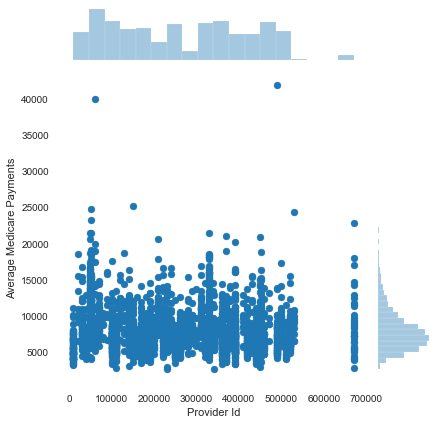

In [59]:
sns.jointplot(x='Provider Id', y='Average Medicare Payments', data=a)
plt.show()

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
model = LinearRegression()
model.fit(a['Provider Id'].values.reshape(-1, 1),
          a['Average Medicare Payments'].values.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
model.score(a['Provider Id'].values.reshape(-1, 1),
          a['Average Medicare Payments'].values.reshape(-1, 1))

0.01382522674279818

In [66]:
model_rand = RandomForestRegressor()
model_rand.fit(a['Provider Id'].values.reshape(-1, 1),
               a['Average Medicare Payments'].values.reshape(-1, 1))

C:\Users\shaur\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [67]:
model_rand.score(a['Provider Id'].values.reshape(-1, 1),
                 a['Average Medicare Payments'].values.reshape(-1, 1))

0.8592835056926411

In [73]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [70, 80, 90, 100, 120, 150, 200],
    'max_features': range(0, 10, 1),
}

model_rgscv = GridSearchCV(RandomForestRegressor(random_state=12345),
                           param_grid,
                           cv=10,
                           verbose=10,
                           n_jobs=-1)

model_rgscv.fit(a['Provider Id'].values.reshape(-1, 1),
                a['Average Medicare Payments'].values.reshape(-1, 1))

Fitting 10 folds for each of 70 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0549s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1566s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1234s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 166 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 182 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.18

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False,
                                             random_state=12345, verbose=0,
                                             warm_st

In [75]:
model_rgscv.score(a['Provider Id'].values.reshape(-1, 1),
                a['Average Medicare Payments'].values.reshape(-1, 1))

0.8616041713563215

In [110]:
from keras.models import Sequential
from keras.layers import Dense
#Initializing Neural Network
classifier=Sequential()

In [111]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 4 , init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'relu'))

C:\Users\shaur\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  
C:\Users\shaur\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=4, kernel_initializer="uniform")`
  """
C:\Users\shaur\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1, kernel_initializer="uniform")`
  


In [114]:
# Compiling Neural Network
classifier.compile(optimizer = 'sgd', loss = 'mean_squared_error', weighted_metrics = ['mae'], metrics= ['acc'])

### Random Forest Regressor gave the best accuracy so we will go ahead with that.

In [116]:
a['Predicted']=model_rgscv.predict(a['Provider Id'].values.reshape(-1,1))
a['Residual']=abs(a['Predicted']-a['Average Medicare Payments'])

In [121]:
#Details Concerning Required Providers
a.sort_values('Residual', ascending=False).head(3)

,Provider Id,Average Medicare Payments,Predicted,Residual
3143,490142,41836.888890,28375.273054,13461.615836
540,60096,39943.173080,28701.824243,11241.348837
1102,150166,25098.255195,17412.557874,7685.697321


In [122]:
#For outpatient
a=outpatient[['Provider Id','Average Total Payments']].groupby('Provider Id').mean().reset_index()
a.head()

,Provider Id,Average Total Payments
0,10001,285.699426
1,10005,254.564837
2,10006,221.871666
3,10007,251.371890
4,10008,207.481575


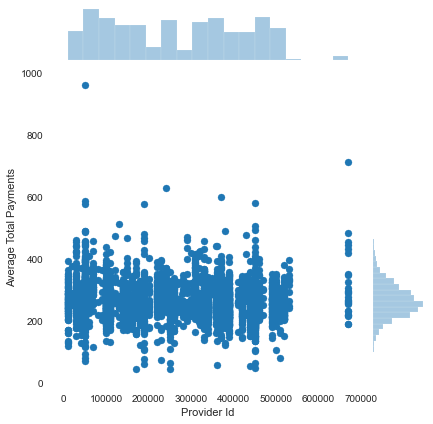

In [124]:
sns.jointplot(x='Provider Id', y='Average Total Payments', data=a)
plt.show()

In [125]:
model = RandomForestRegressor()
model.fit(a['Provider Id'].values.reshape(-1,1),a['Average Total Payments'].values.reshape(-1,1))

C:\Users\shaur\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [126]:
model.score(a['Provider Id'].values.reshape(-1, 1),
            a['Average Total Payments'].values.reshape(-1, 1))

0.8245306831561162

In [128]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [70, 80, 90, 100, 120, 150, 200],
    'max_features': range(0, 10, 1),
}

model_rgscv = GridSearchCV(RandomForestRegressor(random_state=12345),
                           param_grid,
                           cv=10,
                           verbose=10,
                           n_jobs=-1)

model_rgscv.fit(a['Provider Id'].values.reshape(-1, 1),
                a['Average Total Payments'].values.reshape(-1, 1))

Fitting 10 folds for each of 70 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1956s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0602s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 169 tasks      | elapsed:    9.7s
[Parallel(n_jo

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False,
                                             random_state=12345, verbose=0,
                                             warm_st

In [129]:
model_rgscv.score(a['Provider Id'].values.reshape(-1, 1),
            a['Average Total Payments'].values.reshape(-1, 1))

0.8285631697332523

In [130]:
a['Predicted']=model_rgscv.predict(a['Provider Id'].values.reshape(-1,1))
a['Residual']=abs(a['Predicted']-a['Average Total Payments'])

In [132]:
#Details Concerning Required Providers
a.sort_values('Residual',ascending=False).head(3)

,Provider Id,Average Total Payments,Predicted,Residual
432,50714,960.595632,751.311614,209.284018
284,50205,585.830000,459.402246,126.427754
3134,670061,712.396480,590.455504,121.940976


In [133]:
#Part2: B: Regions Least Like Others

In [134]:
#For inpatient
b = inpatient[['Provider State', 'Average Medicare Payments'
               ]].groupby('Provider State').mean().reset_index()
b['State_col'] = b.index
b.head()

,Provider State,Average Medicare Payments,State_col
0,AK,12958.973677,0
1,AL,6418.011329,1
2,AR,6919.725054,2
3,AZ,8825.721445,3
4,CA,11494.385763,4


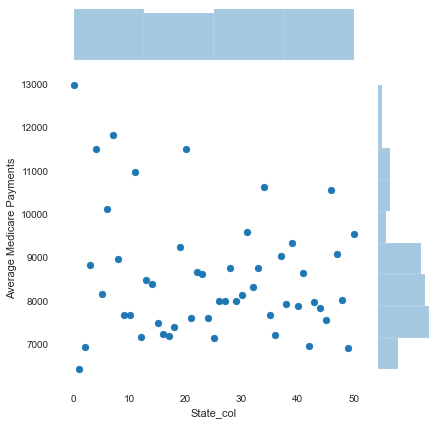

In [135]:
sns.jointplot(x='State_col', y='Average Medicare Payments', data=b)
plt.show()

In [136]:
model = RandomForestRegressor()
model.fit(b['State_col'].values.reshape(-1,1),b['Average Medicare Payments'].values.reshape(-1,1))

C:\Users\shaur\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [137]:
model.score(b['State_col'].values.reshape(-1,1),b['Average Medicare Payments'].values.reshape(-1,1))

0.7839642283218924

In [138]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [70, 80, 90, 100, 120, 150, 200],
    'max_features': range(0, 10, 1),
}

model_rgscv = GridSearchCV(RandomForestRegressor(random_state=12345),
                           param_grid,
                           cv=10,
                           verbose=10,
                           n_jobs=-1)

model_rgscv.fit(b['State_col'].values.reshape(-1, 1),
                b['Average Medicare Payments'].values.reshape(-1, 1))

Fitting 10 folds for each of 70 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1914s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 244 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 282 tas

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False,
                                             random_state=12345, verbose=0,
                                             warm_st

In [139]:
model_rgscv.score(b['State_col'].values.reshape(-1,1),b['Average Medicare Payments'].values.reshape(-1,1))

0.8008950118175274

In [140]:
b['Predicted']=model_rgscv.predict(b['State_col'].values.reshape(-1,1))
b['Residual']=abs(b['Predicted']-b['Average Medicare Payments'])

In [142]:
#Details Concerning Required States
b.sort_values('Residual',ascending=False).head(3)

,Provider State,Average Medicare Payments,State_col,Predicted,Residual
0,AK,12958.973677,0,11109.792003,1849.181674
1,AL,6418.011329,1,8133.654135,1715.642806
4,CA,11494.385763,4,10249.450856,1244.934908


In [143]:
#For outpatients
b = outpatient[['Provider State', 'Average Total Payments'
                ]].groupby('Provider State').mean().reset_index()
b['State_col'] = b.index

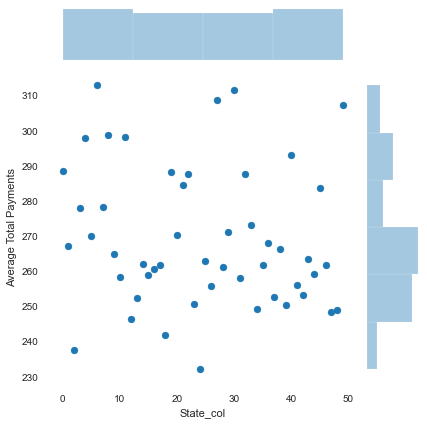

In [144]:
sns.jointplot(x='State_col', y='Average Total Payments', data=b)

plt.show()

In [145]:
model = RandomForestRegressor()
model.fit(b['State_col'].values.reshape(-1,1), b['Average Total Payments'].values.reshape(-1,1))

C:\Users\shaur\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [146]:
model.score(b['State_col'].values.reshape(-1,1), b['Average Total Payments'].values.reshape(-1,1))

0.7802858379909832

In [147]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [70, 80, 90, 100, 120, 150, 200],
    'max_features': range(0, 10, 1),
}

model_rgscv = GridSearchCV(RandomForestRegressor(random_state=12345),
                           param_grid,
                           cv=10,
                           verbose=10,
                           n_jobs=-1)

model_rgscv.fit(b['State_col'].values.reshape(-1, 1),
                b['Average Total Payments'].values.reshape(-1, 1))

Fitting 10 folds for each of 70 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0459s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1685s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 436 tasks      | elapsed:    5.3s
[Parallel(n_jo

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False,
                                             random_state=12345, verbose=0,
                                             warm_st

In [148]:
model.score(b['State_col'].values.reshape(-1,1), b['Average Total Payments'].values.reshape(-1,1))

0.7802858379909832

In [149]:
b['Predicted'] = model.predict(b['State_col'].values.reshape(-1, 1))
b['Residual'] = abs(b['Predicted'] - b['Average Total Payments'])

In [150]:
#Details Concerning Required States
b.sort_values('Residual', ascending=False).head(3)

,Provider State,Average Total Payments,State_col,Predicted,Residual
49,WY,307.213348,49,287.101547,20.111801
31,NM,257.995555,31,276.501275,18.505720
27,ND,308.585477,27,290.242285,18.343193


### Part3: Identify 10000 Medicare patients who are involved in anomalous activities.

In [158]:
history.head()

,id,age,gender,income
0,306535165,65-74,F,24000-31999
1,742231134,65-74,F,48000+
2,928807201,75-84,M,24000-31999
3,83686538,<65,F,32000-47999
4,755607449,65-74,F,48000+


In [159]:
history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 4 columns):
id        500000 non-null int64
age       497470 non-null object
gender    500000 non-null object
income    497469 non-null object
dtypes: int64(1), object(3)
memory usage: 15.3+ MB


In [160]:
history.describe()

,id
count,5.000000e+05
mean,5.001562e+08
std,2.884206e+08
min,7.561000e+03
25%,2.505402e+08
50%,5.001085e+08
75%,7.495556e+08
max,9.999957e+08


In [161]:
trans.head()

,id,global_proc_id,count
0,159125,1,1
1,191852,1,1
2,321083,1,1
3,383037,1,1
4,467729,1,1


In [162]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514809 entries, 0 to 1514808
Data columns (total 3 columns):
id                1514809 non-null int64
global_proc_id    1514809 non-null int64
count             1514809 non-null int64
dtypes: int64(3)
memory usage: 34.7 MB


In [163]:
trans.describe()

,id,global_proc_id,count
count,1.514809e+06,1.514809e+06,1514809.0
mean,5.000708e+08,3.847588e+01,1.0
std,2.883678e+08,3.123966e+01,0.0
min,7.561000e+03,1.000000e+00,1.0
25%,2.504427e+08,2.200000e+01,1.0
50%,4.999363e+08,2.600000e+01,1.0
75%,7.493563e+08,4.200000e+01,1.0
max,9.999957e+08,1.300000e+02,1.0


In [164]:
#Fixing the null values; replacing them with mode

In [165]:
history.age = history.age.fillna(history.age.mode()[0])
history.income = history.income.fillna(history.income.mode()[0])

In [166]:
trans=trans[['id','count']].groupby('id').sum()

In [167]:
history.set_index('id',inplace=True)

In [168]:
#Combining transactional information, trans and history data set, to form "x" which will form base table

In [169]:
x=pd.concat([trans,history],join='inner',axis=1)

In [170]:
x.head()

,count,age,gender,income
id,,,,
7561,2,65-74,M,48000+
7619,2,<65,F,48000+
10479,4,65-74,F,<16000
13515,2,75-84,M,<16000
15213,6,85+,M,32000-47999


In [171]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 7561 to 999995713
Data columns (total 4 columns):
count     500000 non-null int64
age       500000 non-null object
gender    500000 non-null object
income    500000 non-null object
dtypes: int64(1), object(3)
memory usage: 19.1+ MB


In [172]:
x.describe()

,count
count,500000.000000
mean,2.999536
std,1.416457
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,13.000000


In [173]:
#Creating dummy variables
columns = ['age', 'gender', 'income']
for i in columns:
    dummy = pd.get_dummies(x[i], prefix=i)
    x = pd.concat([x, dummy], axis=1)
    x.drop(i, axis=1, inplace=True)

In [175]:
from sklearn.preprocessing import StandardScaler
xs = StandardScaler().fit_transform(x)

In [176]:
x2 = pd.DataFrame(xs)
x2.columns = x.columns
x2.index = x.index

In [178]:
from sklearn.neighbors import LocalOutlierFactor
xx = LocalOutlierFactor(n_neighbors=50, n_jobs=-1, contamination=0.002)

In [179]:
xa=xx.fit_predict(x2)

In [180]:
label = pd.DataFrame(xa)
label.index = x2.index
label.columns = ['label']

In [181]:
label.label.value_counts()

 1    499011
-1       989
Name: label, dtype: int64

In [182]:
xo=x2[label.label==-1]

In [183]:
#Required list of people involved in malicious activities
xo

,count,age_65-74,age_75-84,age_85+,age_<65,gender_F,gender_M,income_16000-23999,income_24000-31999,income_32000-47999,income_48000+,income_<16000
id,,,,,,,,,,,,
1552051,4.236251,-0.893112,-0.589644,2.596578,-0.451183,0.906319,-0.906319,-0.507776,-0.422289,-0.487149,-0.557009,1.910315
2385395,4.942239,-0.893112,1.695939,-0.385122,-0.451183,0.906319,-0.906319,1.969373,-0.422289,-0.487149,-0.557009,-0.523474
2462212,3.530264,-0.893112,-0.589644,2.596578,-0.451183,-1.103364,1.103364,1.969373,-0.422289,-0.487149,-0.557009,-0.523474
2673778,3.530264,-0.893112,-0.589644,2.596578,-0.451183,-1.103364,1.103364,-0.507776,-0.422289,-0.487149,-0.557009,1.910315
2777478,3.530264,-0.893112,1.695939,-0.385122,-0.451183,-1.103364,1.103364,-0.507776,2.368045,-0.487149,-0.557009,-0.523474
...,...,...,...,...,...,...,...,...,...,...,...,...
996449832,3.530264,-0.893112,1.695939,-0.385122,-0.451183,0.906319,-0.906319,-0.507776,2.368045,-0.487149,-0.557009,-0.523474
996803072,3.530264,-0.893112,-0.589644,-0.385122,2.216394,-1.103364,1.103364,-0.507776,-0.422289,-0.487149,-0.557009,1.910315
997414065,3.530264,-0.893112,-0.589644,2.596578,-0.451183,0.906319,-0.906319,-0.507776,-0.422289,2.052759,-0.557009,-0.523474
